Project 1 Overview

Saturday Tasks
- Clean the data set
- Put data set into a data frame
- Do a binding of the data set by price points
    - $9.99 >
    - $10 - $19.99
    - $20 - $29.99
    - $30 - $39.99
    - $40 - $49.99
    - $50 - $59.99
    - $60 - $69.99
    - $70 - $79.99
    - $80 - $89.99
    - $90 - $99.99
    - > $100
- Focus only on wines that have a price point of $100 or less for the general analysis.


In [37]:
#Dependencies

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import requests
import json
#from api_keys import api_key
from pprint import pprint


In [38]:
# Wine Study Files
wine_data = "Resources/white-wine-price-rating.csv"

In [39]:
wine_data = pd.read_csv(wine_data)
wine_data.head(20)

,FullName,Winery,WineName,Year,Region,RegionalVariety,VintageRating,VintageRatingCount,WineRating,WineRatingCount,VintagePrice,WinePrice,VintageRatingPriceRatio,WineRatingPriceRatio
0,Domaine Coche-Dury Meursault Les Rougeots 2001,Domaine Coche-Dury,Meursault Les Rougeots,2001,Burgundy,Côte de Beaune White,4.9,25,4.7,755,806.580,806.580,0.006075,0.005827
1,Joseph Drouhin Montrachet Grand Cru Marquis de...,Joseph Drouhin,Montrachet Grand Cru Marquis de Laguiche,2015,Burgundy,Côte de Beaune White,4.8,46,4.6,1191,680.000,680.000,0.007059,0.006765
2,Marcassin Marcassin Vineyard Chardonnay 2013,Marcassin,Marcassin Vineyard Chardonnay,2013,Californian,Chardonnay,4.8,28,4.6,884,448.000,448.000,0.010714,0.010268
3,M. Chapoutier Ermitage Le Méal Blanc 2006,M. Chapoutier,Ermitage Le Méal Blanc,2006,Northern Rhône,White,4.8,31,4.5,414,164.675,164.675,0.029148,0.027327
4,Domaine Coche-Dury Corton-Charlemagne Grand Cr...,Domaine Coche-Dury,Corton-Charlemagne Grand Cru,2007,Burgundy,Côte de Beaune White,4.8,35,4.7,454,3478.360,3478.360,0.001380,0.001351
5,Domaine Coche-Dury Corton-Charlemagne Grand Cr...,Domaine Coche-Dury,Corton-Charlemagne Grand Cru,2009,Burgundy,Côte de Beaune White,4.8,35,4.7,454,4022.800,4022.800,0.001193,0.001168
6,Keller G-Max Riesling 2009,Keller,G-Max Riesling,2009,German,Riesling,4.8,37,4.7,209,2420.000,2420.000,0.001983,0.001942
7,Château Haut-Brion Pessac-Léognan Blanc (Grand...,Château Haut-Brion,Pessac-Léognan Blanc (Grand Cru Classé de Graves),2005,Bordeaux,White,4.8,39,4.5,820,864.000,864.000,0.005556,0.005208
8,Domaine de La Romanée-Conti Montrachet Grand C...,Domaine de La Romanée-Conti,Montrachet Grand Cru,2010,Burgundy,Côte de Beaune White,4.8,43,4.7,1348,7249.110,7249.110,0.000662,0.000648
9,Domaine de La Romanée-Conti Montrachet Grand C...,Domaine de La Romanée-Conti,Montrachet Grand Cru,2014,Burgundy,Côte de Beaune White,4.8,43,4.7,1348,5419.190,5419.190,0.000886,0.000867


In [40]:
wine_data.count()

FullName                   4594
Winery                     4594
WineName                   4594
Year                       4594
Region                     4217
RegionalVariety            4217
VintageRating              4594
VintageRatingCount         4594
WineRating                 4594
WineRatingCount            4594
VintagePrice               4594
WinePrice                  4594
VintageRatingPriceRatio    4594
WineRatingPriceRatio       4594
dtype: int64

In [41]:
#Dropping lines with incomplete information.
wine_data_2 = wine_data.dropna(how="any")
wine_data_2.count()

FullName                   4217
Winery                     4217
WineName                   4217
Year                       4217
Region                     4217
RegionalVariety            4217
VintageRating              4217
VintageRatingCount         4217
WineRating                 4217
WineRatingCount            4217
VintagePrice               4217
WinePrice                  4217
VintageRatingPriceRatio    4217
WineRatingPriceRatio       4217
dtype: int64

In [42]:
#Removed Duplicates
wine_data_nodupes_df= wine_data_2.drop_duplicates(subset=['FullName'])
wine_data_nodupes_df.count()

FullName                   4216
Winery                     4216
WineName                   4216
Year                       4216
Region                     4216
RegionalVariety            4216
VintageRating              4216
VintageRatingCount         4216
WineRating                 4216
WineRatingCount            4216
VintagePrice               4216
WinePrice                  4216
VintageRatingPriceRatio    4216
WineRatingPriceRatio       4216
dtype: int64

In [43]:
wine_data_nodupes_df.describe()

,VintageRating,VintageRatingCount,WineRating,WineRatingCount,VintagePrice,WinePrice,VintageRatingPriceRatio,WineRatingPriceRatio
count,4216.000000,4216.000000,4216.000000,4216.000000,4216.000000,4216.000000,4216.000000,4216.000000
mean,4.212547,133.015892,4.164398,1298.209203,109.568048,109.568048,0.098787,0.097349
std,0.173599,240.320992,0.176996,2051.018030,456.464993,456.464993,0.054398,0.053151
min,3.900000,25.000000,3.500000,28.000000,15.020000,15.020000,0.000512,0.000512
25%,4.100000,40.000000,4.000000,387.000000,29.247500,29.247500,0.054994,0.054437
50%,4.200000,69.000000,4.200000,749.000000,43.490000,43.490000,0.096154,0.094771
75%,4.300000,137.000000,4.300000,1465.000000,78.035000,78.035000,0.141067,0.138995
max,4.900000,6883.000000,4.700000,37863.000000,9180.000000,9180.000000,0.272969,0.259654


In [22]:
#Age Demographics - Binned into bins of 4 years.  
#bins = [0, 10, 14, 19, 24, 29, 34, 39, 45]

# Create the names for the five bins
#age_groups = ["<10", "11-14", "15-19", "20-24", "25-29", "30-34", "35-39", "40+"]

#purchase_file_df["Age Summary"] = pd.cut(purchase_file_df["Age"], bins, labels=age_groups, include_lowest=True)
#purchase_file_df

#Wine pricing - binning  at $10 increments up to $100.    
bins = [0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.22, 0.24]


#Wine pricing - binning  at $10 increments up to $100.    
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 5000]

# Create the names for the five bins
wine_pricing = ["<$9.99", "$10-$19.99", "$20-$29.99", "$30-$39.99", "$40-$49.99", "$50-$59.99", "$60-$69.99", "$70-$79.99", "$80-$89.99", "$90-$99.99", "$100<"]

wine_data_nodupes_df

C:\Users\Maher\anaconda3\envs\bcs\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,FullName,Winery,WineName,Year,Region,RegionalVariety,VintageRating,VintageRatingCount,WineRating,WineRatingCount,VintagePrice,WinePrice,VintageRatingPriceRatio,WineRatingPriceRatio,Wine Grouped_Pricing
0,Domaine Coche-Dury Meursault Les Rougeots 2001,Domaine Coche-Dury,Meursault Les Rougeots,2001,Burgundy,Côte de Beaune White,4.9,25,4.7,755,806.580,806.580,0.006075,0.005827,$100<
1,Joseph Drouhin Montrachet Grand Cru Marquis de...,Joseph Drouhin,Montrachet Grand Cru Marquis de Laguiche,2015,Burgundy,Côte de Beaune White,4.8,46,4.6,1191,680.000,680.000,0.007059,0.006765,$100<
2,Marcassin Marcassin Vineyard Chardonnay 2013,Marcassin,Marcassin Vineyard Chardonnay,2013,Californian,Chardonnay,4.8,28,4.6,884,448.000,448.000,0.010714,0.010268,$100<
3,M. Chapoutier Ermitage Le Méal Blanc 2006,M. Chapoutier,Ermitage Le Méal Blanc,2006,Northern Rhône,White,4.8,31,4.5,414,164.675,164.675,0.029148,0.027327,$100<
4,Domaine Coche-Dury Corton-Charlemagne Grand Cr...,Domaine Coche-Dury,Corton-Charlemagne Grand Cru,2007,Burgundy,Côte de Beaune White,4.8,35,4.7,454,3478.360,3478.360,0.001380,0.001351,$100<
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4587,Bachelet-Monnot Maranges 1er Cru 'La Fussière'...,Bachelet-Monnot,Maranges 1er Cru 'La Fussière' Blanc,2015,Burgundy,Côte de Beaune White,4.0,25,4.1,134,28.450,28.450,0.140598,0.144112,$20-$29.99
4588,Allimant-Laugner Pinot Gris 2016,Allimant-Laugner,Pinot Gris,2016,Alsace,Pinot Gris,4.0,25,3.7,137,20.700,20.700,0.193237,0.178744,$20-$29.99
4589,Domaine du Tunnel Saint-Péray Roussanne 2018,Domaine du Tunnel,Saint-Péray Roussanne,2018,Northern Rhône,Saint-Péray,4.0,25,4.0,543,23.530,23.530,0.169996,0.169996,$20-$29.99
4590,Brown Brothers Patricia Chardonnay 2010,Brown Brothers,Patricia Chardonnay,2010,Australian,Chardonnay,4.0,25,4.0,194,29.480,29.480,0.135685,0.135685,$20-$29.99


In [60]:
# Removing records with price >$100
wine_under_100_df = wine_data_nodupes_df[wine_data_nodupes_df['WinePrice'] < 100]
wine_under_100_df

,FullName,Winery,WineName,Year,Region,RegionalVariety,VintageRating,VintageRatingCount,WineRating,WineRatingCount,VintagePrice,WinePrice,VintageRatingPriceRatio,WineRatingPriceRatio
891,Terlan (Terlano) Pinot Bianco Riserva Vorberg ...,Terlan (Terlano),Pinot Bianco Riserva Vorberg,2015,Northern Italy,Pinot Blanc,4.2,747,4.1,5127,37.500,37.500,0.112000,0.109333
907,Domaine de la Tournelle Terre de Gryphées 2015,Domaine de la Tournelle,Terre de Gryphées,2015,Jura,White,4.2,81,4.0,443,42.000,42.000,0.100000,0.095238
908,Cordero di Montezemolo Chardonnay Langhe Elior...,Cordero di Montezemolo,Chardonnay Langhe Elioro,2015,Northern Italy,White,4.2,81,4.2,477,43.385,43.385,0.096808,0.096808
924,Jean Marc Pillot La Périère Saint-Romain 2015,Jean Marc Pillot,La Périère Saint-Romain,2015,Burgundy,Côte de Beaune White,4.2,38,4.0,131,27.500,27.500,0.152727,0.145455
935,Egon Müller - Scharzhof Riesling Scharzhof 2015,Egon Müller - Scharzhof,Riesling Scharzhof,2015,German,Riesling,4.1,308,4.1,2153,47.415,47.415,0.086471,0.086471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4587,Bachelet-Monnot Maranges 1er Cru 'La Fussière'...,Bachelet-Monnot,Maranges 1er Cru 'La Fussière' Blanc,2015,Burgundy,Côte de Beaune White,4.0,25,4.1,134,28.450,28.450,0.140598,0.144112
4588,Allimant-Laugner Pinot Gris 2016,Allimant-Laugner,Pinot Gris,2016,Alsace,Pinot Gris,4.0,25,3.7,137,20.700,20.700,0.193237,0.178744
4589,Domaine du Tunnel Saint-Péray Roussanne 2018,Domaine du Tunnel,Saint-Péray Roussanne,2018,Northern Rhône,Saint-Péray,4.0,25,4.0,543,23.530,23.530,0.169996,0.169996
4590,Brown Brothers Patricia Chardonnay 2010,Brown Brothers,Patricia Chardonnay,2010,Australian,Chardonnay,4.0,25,4.0,194,29.480,29.480,0.135685,0.135685


In [62]:
#wine_under_100_rates_df = wine_under_100_df[wine_under_100_df['WineRating'] >4.0]
#wine_under_100_rates_df

,FullName,Winery,WineName,Year,Region,RegionalVariety,VintageRating,VintageRatingCount,WineRating,WineRatingCount,VintagePrice,WinePrice,VintageRatingPriceRatio,WineRatingPriceRatio
891,Terlan (Terlano) Pinot Bianco Riserva Vorberg ...,Terlan (Terlano),Pinot Bianco Riserva Vorberg,2015,Northern Italy,Pinot Blanc,4.2,747,4.1,5127,37.500,37.500,0.112000,0.109333
908,Cordero di Montezemolo Chardonnay Langhe Elior...,Cordero di Montezemolo,Chardonnay Langhe Elioro,2015,Northern Italy,White,4.2,81,4.2,477,43.385,43.385,0.096808,0.096808
935,Egon Müller - Scharzhof Riesling Scharzhof 2015,Egon Müller - Scharzhof,Riesling Scharzhof,2015,German,Riesling,4.1,308,4.1,2153,47.415,47.415,0.086471,0.086471
941,Radikon Slatnik 2016,Radikon,Slatnik,2016,Northern Italy,White,4.1,312,4.1,1338,39.500,39.500,0.103797,0.103797
1034,Dönnhoff Oberhäuser Brücke Riesling Spätlese 2007,Dönnhoff,Oberhäuser Brücke Riesling Spätlese,2007,German,Riesling,4.5,40,4.1,639,34.995,34.995,0.128590,0.117160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4578,Henri Bourgeois Pouilly-Fumé La Demoiselle de ...,Henri Bourgeois,Pouilly-Fumé La Demoiselle de Bourgeois,2008,Upper Loire Valley,White,4.0,27,4.1,1324,25.160,25.160,0.158983,0.162957
4579,Dopff au Moulin Gewürztraminer Grand Cru Spore...,Dopff au Moulin,Gewürztraminer Grand Cru Sporen de Riquewihr,2009,Alsace,Gewürztraminer,4.0,27,4.1,440,28.000,28.000,0.142857,0.146429
4586,Jacques de Klerk Rêverie Chenin Blanc 2016,Jacques de Klerk,Rêverie Chenin Blanc,2016,South African,Chenin Blanc,4.0,25,4.1,51,26.330,26.330,0.151918,0.155716
4587,Bachelet-Monnot Maranges 1er Cru 'La Fussière'...,Bachelet-Monnot,Maranges 1er Cru 'La Fussière' Blanc,2015,Burgundy,Côte de Beaune White,4.0,25,4.1,134,28.450,28.450,0.140598,0.144112


In [24]:
wine_under_100_df.describe()

,VintageRating,VintageRatingCount,WineRating,WineRatingCount,VintagePrice,WinePrice,VintageRatingPriceRatio,WineRatingPriceRatio
count,3441.000000,3441.000000,3441.000000,3441.000000,3441.000000,3441.000000,3441.000000,3441.000000
mean,4.165650,142.654752,4.112554,1271.537344,43.043981,43.043981,0.115708,0.113977
std,0.134855,260.087852,0.140987,2162.933513,19.739198,19.739198,0.045180,0.043940
min,3.900000,25.000000,3.500000,28.000000,15.020000,15.020000,0.040076,0.041408
25%,4.100000,41.000000,4.000000,358.000000,27.280000,27.280000,0.076378,0.076268
50%,4.200000,73.000000,4.100000,685.000000,37.390000,37.390000,0.111702,0.110795
75%,4.300000,145.000000,4.200000,1417.000000,55.000000,55.000000,0.150128,0.148148
max,4.700000,6883.000000,4.600000,37863.000000,99.980000,99.980000,0.272969,0.259654


In [25]:
#Price Analysis by Region
var_stat= wine_under_100_df.groupby('Region')["WinePrice"].var()
med_stat= wine_under_100_df.groupby('Region')["WinePrice"].median()
std_stat= wine_under_100_df.groupby('Region')["WinePrice"].std()
men_stat= wine_under_100_df.groupby('Region')["WinePrice"].mean()
sem_stat= wine_under_100_df.groupby('Region')["WinePrice"].sem()

wine_region_price_stats_df = pd.DataFrame({"Variance":var_stat, "Median": med_stat, "Mean": men_stat, "Standard Dev": std_stat, "SEM": sem_stat})
#wine_region_price_stats_df

,Variance,Median,Mean,Standard Dev,SEM
Region,,,,,
Chilean,NaN,89.650,89.650000,NaN,NaN
Alsace,324.334110,37.560,43.771029,18.009278,1.361373
Argentinian,458.116469,57.970,51.630000,21.403656,4.119135
Australian,373.890946,36.310,43.939716,19.336260,2.061252
Austrian,366.277051,34.895,40.797917,19.138366,2.762385
Bordeaux,540.315125,61.750,56.674198,23.244679,2.582742
Burgundy,422.960464,45.370,49.018606,20.566003,0.593195
Californian,519.983564,45.000,52.692897,22.803148,1.893698
Canadian,7.454633,30.930,31.126667,2.730317,1.576350


In [ ]:
plt.title("Capomulin: Mice Weight vs Tumor Size")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Timepoint")
plt.scatter(tumor_capomulin_df["Weight (g)"], tumor_capomulin_df["Tumor Volume (mm3)"], alpha = 0.5)

In [26]:
#Ratings Analysis by Region
var_stat= wine_under_100_df.groupby('Region')["WineRating"].var()
med_stat= wine_under_100_df.groupby('Region')["WineRating"].median()
std_stat= wine_under_100_df.groupby('Region')["WineRating"].std()
men_stat= wine_under_100_df.groupby('Region')["WineRating"].mean()
sem_stat= wine_under_100_df.groupby('Region')["WineRating"].sem()

wine_ratings_region_stats_df = pd.DataFrame({"Variance":var_stat, "Median": med_stat, "Mean": men_stat, "Standard Dev": std_stat, "SEM": sem_stat})
#wine_ratings_region_stats_df

,Variance,Median,Mean,Standard Dev,SEM
Region,,,,,
Chilean,NaN,4.3,4.300000,NaN,NaN
Alsace,0.017720,4.1,4.136000,0.133115,0.010063
Argentinian,0.019858,4.3,4.229630,0.140917,0.027119
Australian,0.029539,4.1,4.073864,0.171869,0.018321
Austrian,0.025035,4.1,4.091667,0.158226,0.022838
Bordeaux,0.013818,4.1,4.076543,0.117550,0.013061
Burgundy,0.017807,4.1,4.120050,0.133445,0.003849
Californian,0.023898,4.2,4.162069,0.154591,0.012838
Canadian,0.013333,3.9,3.966667,0.115470,0.066667


In [51]:
highly_rated_regions = wine_ratingsratio_region_stats_df[wine_ratingsratio_region_stats_df['Mean'] > 4.0]
highly_rated_regions

,Variance,Median,Mean,Standard Dev,SEM
Region,,,,,


In [45]:
#Wine Ratings Ratio Analysis by Region
var_stat= wine_under_100_df.groupby('Region')["WineRatingPriceRatio"].var()
med_stat= wine_under_100_df.groupby('Region')["WineRatingPriceRatio"].median()
std_stat= wine_under_100_df.groupby('Region')["WineRatingPriceRatio"].std()
men_stat= wine_under_100_df.groupby('Region')["WineRatingPriceRatio"].mean()
sem_stat= wine_under_100_df.groupby('Region')["WineRatingPriceRatio"].sem()

wine_ratingsratio_region_stats_df = pd.DataFrame({"Variance":var_stat, "Median": med_stat, "Mean": men_stat, "Standard Dev": std_stat, "SEM": sem_stat})
wine_ratingsratio_region_stats_df

,Variance,Median,Mean,Standard Dev,SEM
Region,,,,,
Chilean,NaN,0.047964,0.047964,NaN,NaN
Alsace,0.001569,0.109159,0.109518,0.039606,0.002994
Argentinian,0.002320,0.074176,0.100156,0.048166,0.009270
Australian,0.001560,0.110291,0.108654,0.039500,0.004211
Austrian,0.001793,0.117330,0.118132,0.042349,0.006113
Bordeaux,0.002050,0.066397,0.089047,0.045274,0.005030
Burgundy,0.001629,0.091010,0.099609,0.040363,0.001164
Californian,0.001338,0.093182,0.093404,0.036580,0.003038
Canadian,0.000214,0.126091,0.128275,0.014615,0.008438


In [48]:
highly_rate_ratio_regions = wine_ratingsratio_region_stats_df[wine_ratingsratio_region_stats_df['Mean'] > 0.135]
highly_rate_ratio_regions

,Variance,Median,Mean,Standard Dev,SEM
Region,,,,,
Greek,NaN,0.195331,0.195331,NaN,NaN
Greek Santorini,0.000895,0.135542,0.138568,0.029909,0.006688
Italian,0.001564,0.150943,0.145732,0.039546,0.009591
Languedoc-Roussillon,0.001671,0.141693,0.143745,0.040872,0.006545
Loire Muscadet,0.000095,0.144928,0.141876,0.009731,0.004352
New Zealand,0.001200,0.145794,0.147866,0.034642,0.003948
Northern Portugal,0.001567,0.139811,0.144673,0.039589,0.004698
Portuguese,0.002507,0.169220,0.155554,0.050070,0.011802
South African,0.001585,0.154775,0.146413,0.039817,0.003506


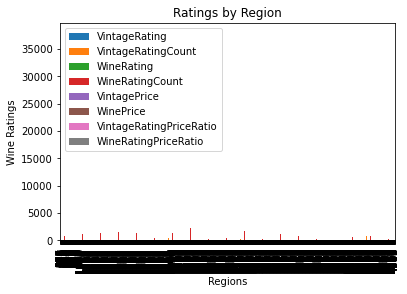

In [28]:

Ratings_wines_by_region_df = wine_under_100_df.groupby("Region").mean()


#plt.bar(x_axis, users, color='r', alpha=0.5, align="center"
wine_under_100_df.plot(kind="bar")
plt.title("Ratings by Region")
plt.xlabel("Regions")
plt.ylabel("Wine Ratings")
plt.show()

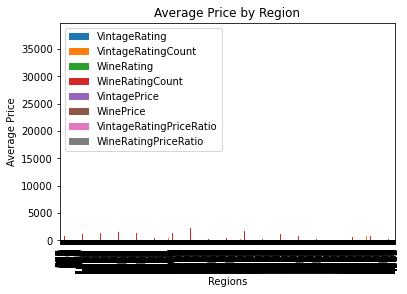

In [29]:
mean_price_wines_by_region_df = wine_under_100_df.groupby("Region")["WinePrice"].mean()


#plt.bar(x_axis, users, color='r', alpha=0.5, align="center"
wine_under_100_df.plot(kind="bar")
plt.title("Average Price by Region")
plt.xlabel("Regions")
plt.ylabel("Average Price")
plt.show()

KeyError: 'Wine Regions'

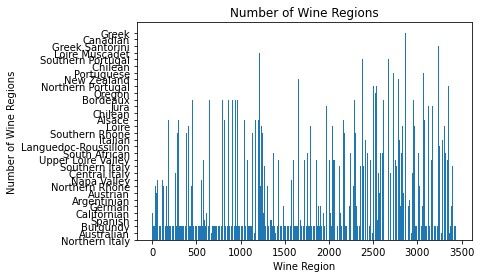

In [30]:
reset_wine_df= wine_under_100_df.reset_index()
x_data = range(len(reset_wine_df["Region"]))
y_data = reset_wine_df["Region"]
plt.bar(x_data, y_data)
plt.title("Number of Wine Regions")
plt.xlabel("Wine Region")
plt.ylabel("Number of Wine Regions")
plt.xticks(x_data, (reset_wine_df["Wine Regions"]), rotation='vertical')
#users2_df= mouse_data_nodupes_df.plot(mouse_data_nodupes_df['Drug Regimen'], kind='bar' , legend=None)
plt.show()

In [35]:
overall_wine_stats_df = pd.merge(wine_ratings_region_stats_df, wine_region_price_stats_df,
                                 how='outer', on='Region')

overall_wine_stats_df

,Variance_x,Median_x,Mean_x,Standard Dev_x,SEM_x,Variance_y,Median_y,Mean_y,Standard Dev_y,SEM_y
Region,,,,,,,,,,
Chilean,NaN,4.3,4.300000,NaN,NaN,NaN,89.650,89.650000,NaN,NaN
Alsace,0.017720,4.1,4.136000,0.133115,0.010063,324.334110,37.560,43.771029,18.009278,1.361373
Argentinian,0.019858,4.3,4.229630,0.140917,0.027119,458.116469,57.970,51.630000,21.403656,4.119135
Australian,0.029539,4.1,4.073864,0.171869,0.018321,373.890946,36.310,43.939716,19.336260,2.061252
Austrian,0.025035,4.1,4.091667,0.158226,0.022838,366.277051,34.895,40.797917,19.138366,2.762385
Bordeaux,0.013818,4.1,4.076543,0.117550,0.013061,540.315125,61.750,56.674198,23.244679,2.582742
Burgundy,0.017807,4.1,4.120050,0.133445,0.003849,422.960464,45.370,49.018606,20.566003,0.593195
Californian,0.023898,4.2,4.162069,0.154591,0.012838,519.983564,45.000,52.692897,22.803148,1.893698
Canadian,0.013333,3.9,3.966667,0.115470,0.066667,7.454633,30.930,31.126667,2.730317,1.576350


In [36]:
overall_wine_stats_df = overall_wine_stats_df.rename(columns={"Variance_x": "Ratings Variance", "Median_x": "Ratings Median", "Mean_x": "Ratings Mean",
                                      "Standard Dev_x": "Ratings Stand Dev", "SEM_x": "Ratings SEM"})

overall_wine_stats_df = overall_wine_stats_df.rename(columns={"Variance_y": "Price Variance", "Median_y": "Price Median", "Mean_y": "Price Mean",
                                      "Standard Dev_y": "Price Stand Dev", "SEM_y": "Price SEM"})

overall_wine_stats_df

,Ratings Variance,Ratings Median,Ratings Mean,Ratings Stand Dev,Ratings SEM,Price Variance,Price Median,Price Mean,Price Stand Dev,Price SEM
Region,,,,,,,,,,
Chilean,NaN,4.3,4.300000,NaN,NaN,NaN,89.650,89.650000,NaN,NaN
Alsace,0.017720,4.1,4.136000,0.133115,0.010063,324.334110,37.560,43.771029,18.009278,1.361373
Argentinian,0.019858,4.3,4.229630,0.140917,0.027119,458.116469,57.970,51.630000,21.403656,4.119135
Australian,0.029539,4.1,4.073864,0.171869,0.018321,373.890946,36.310,43.939716,19.336260,2.061252
Austrian,0.025035,4.1,4.091667,0.158226,0.022838,366.277051,34.895,40.797917,19.138366,2.762385
Bordeaux,0.013818,4.1,4.076543,0.117550,0.013061,540.315125,61.750,56.674198,23.244679,2.582742
Burgundy,0.017807,4.1,4.120050,0.133445,0.003849,422.960464,45.370,49.018606,20.566003,0.593195
Californian,0.023898,4.2,4.162069,0.154591,0.012838,519.983564,45.000,52.692897,22.803148,1.893698
Canadian,0.013333,3.9,3.966667,0.115470,0.066667,7.454633,30.930,31.126667,2.730317,1.576350


target_search = "Hotel"
target_radius = 10000
target_type = "lodging"

# set up a parameters dictionary


# base url
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"


for index, row in vacation_temps_nodupes_df.iterrows():
    lat = row['Lat']
    lon = row['Lng']
    target_coordinates =', '.join(map(str, (lat, lon)))   
    params = {
        "location": target_coordinates,
        "keyword": target_search,
        "radius": target_radius,
        "type": target_type,
        "key": gkey
    }
    response = requests.get(base_url, params=params)
    hotels_data = response.json()
    status = hotels_data["status"]
    if status == "OK":
        hotel = hotels_data["results"][0]["name"]
        vacation_temps_nodupes_df.loc[index, 'Hotel Name'] = hotel        
        
vacation_temps_nodupes_df

# run a request using our params dictionary

#print(json.dumps(hotels_data, indent=4, sort_keys=True))
#hotel = hotels_data["results"][0]["name"]
#print(hotel)